In [2]:
import bioframe as bf
import pandas as pd
import copy
import numpy as np
from schema import DFSchema
from df_loader import CrisprDFLoader, PredDFLoader
from overlaps import (
    read_overlaps_from_file, merge_multiple_predictions, compute_crispr_overlaps
)
import mplcursors
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000) 
from main import CRISPR_FILENAME,PRED_FILENAME, OVERLAP_FILENAME, ABC_THRESHOLD, TSS_REF_FILE

In [3]:
overlap_df = read_overlaps_from_file(OVERLAP_FILENAME)
df = merge_multiple_predictions(overlap_df, ABC_THRESHOLD)

In [4]:
def random_genes(df, n):
    return np.random.choice(df["TargetGene_crispr"].unique(), size=n, replace=False)

In [5]:
# genes = random_genes(df, 50)
# genes = ['LY6E', 'SNHG15', 'MTRNR2L8', 'HIGD2A', 'NUP37', 'PPP1R15A',
#        'SLC25A10', 'NFATC3', 'SOD1', 'ACBD3', 'KCNQ1OT1', 'FUT1', 'GMPR',
#        'DNAJA1', 'SPACA3', 'FAM177A1', 'SGTA', 'MPG', 'PABPC1', 'ISG20L2',
#        'B3GAT3', 'CST3', 'SENP2', 'MMAB', 'YIPF6', 'UBE2G1', 'CDCA7',
#        'TMEM150A', 'RWDD4', 'TCF3', 'OSTC', 'GEMIN6', 'UBAC1', 'UBE2N',
#        'PTRHD1', 'ING2', 'PRCC', 'NME4', 'RACK1', 'SLC30A5', 'OAZ1',
#        'EPRS', 'SNRPG', 'NPC2', 'PRDX2', 'RPS28', 'CSDE1', 'BZW1',
#        'BOLA3', 'BAG4']
genes = ["MYC"]
eg_pairs = df[df["TargetGene_crispr"].isin(genes)]
eg_pairs = eg_pairs[eg_pairs["EffectSize_crispr"] < 0]

In [17]:
def filter_df(df, CRISPR_pos=None, PRED_pos=None):
    if CRISPR_pos is True:
        df = df[df['IsSignificant_crispr']]
    elif CRISPR_pos is False:
        df = df[~df['IsSignificant_crispr']]
        
    if PRED_pos is True:
        df = df[df['ABC.Score_pred'] > ABC_THRESHOLD]
    elif PRED_pos is False:
        df = df[df['ABC.Score_pred'] <= ABC_THRESHOLD]
    return df

def get_contact(df):
    return np.log10(df['hic_contact_pred'])
    
def get_activity(df):
    return df['DHS.RPKM_pred']

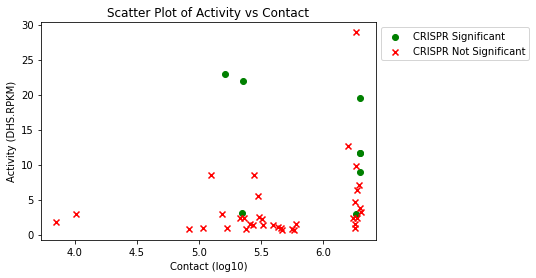

In [16]:
def plot_df(df):
    positives = filter_df(df, CRISPR_pos=True)
    negatives = filter_df(df, CRISPR_pos=False)
    plt.scatter(get_contact(positives), get_activity(positives), marker='o', color='green', label='CRISPR Significant')
    plt.scatter(get_contact(negatives), get_activity(negatives), marker='x', color='red', label='CRISPR Not Significant')
    plt.xlabel('Contact (log10)')
    plt.ylabel('Activity (DHS.RPKM)')
    plt.title('Scatter Plot of Activity vs Contact')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
plot_df(eg_pairs)


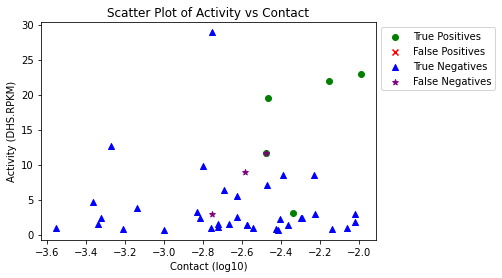

In [8]:
def plot_df(df):
    true_pos = filter_df(df, True, True)
    false_pos = filter_df(df, False, True)
    true_neg = filter_df(df, False, False)
    false_neg = filter_df(df, True, False)
    
    plt.scatter(get_contact(true_pos), get_activity(true_pos), marker='o', color='green', label='True Positives')
    plt.scatter(get_contact(false_pos), get_activity(false_pos), marker='x', color='red', label='False Positives')
    plt.scatter(get_contact(true_neg), get_activity(true_neg), marker='^', color='blue', label='True Negatives')
    plt.scatter(get_contact(false_neg), get_activity(false_neg), marker='*', color='purple', label='False Negatives')
    
    plt.xlabel('Contact (log10)')
    plt.ylabel('Activity (DHS.RPKM)')
    plt.title('Scatter Plot of Activity vs Contact')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
plot_df(eg_pairs)


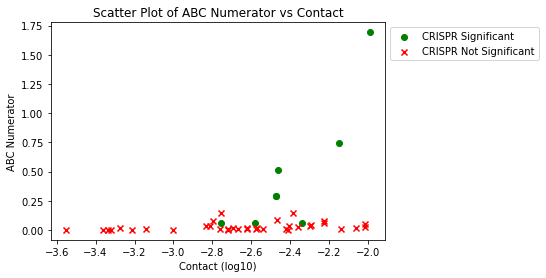

In [9]:
def plot_df(df):
    positives = filter_df(df, CRISPR_pos=True)
    negatives = filter_df(df, CRISPR_pos=False)
    plt.scatter(get_contact(positives), positives["ABC.Score.Numerator_pred"], marker='o', color='green', label='CRISPR Significant')
    plt.scatter(get_contact(negatives), negatives["ABC.Score.Numerator_pred"], marker='x', color='red', label='CRISPR Not Significant')
    plt.xlabel('Contact (log10)')
    plt.ylabel('ABC Numerator')
    plt.title('Scatter Plot of ABC Numerator vs Contact')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
plot_df(eg_pairs)


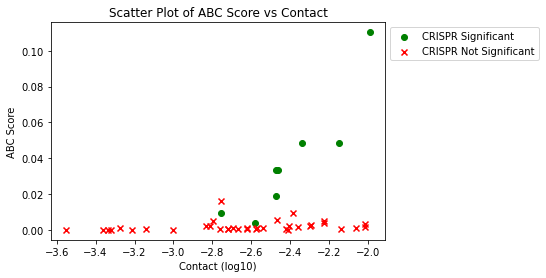

In [10]:
def plot_df(df):
    positives = filter_df(df, CRISPR_pos=True)
    negatives = filter_df(df, CRISPR_pos=False)
    plt.scatter(get_contact(positives), positives["ABC.Score_pred"], marker='o', color='green', label='CRISPR Significant')
    plt.scatter(get_contact(negatives), negatives["ABC.Score_pred"], marker='x', color='red', label='CRISPR Not Significant')
    plt.xlabel('Contact (log10)')
    plt.ylabel('ABC Score')
    plt.title('Scatter Plot of ABC Score vs Contact')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
plot_df(eg_pairs)


In [11]:
crispr_df = CrisprDFLoader(CRISPR_FILENAME, TSS_REF_FILE).load()

In [12]:
eg_pairs[eg_pairs["TargetGene_crispr"] == "PPP1R15A"]["TargetGeneIsExpressed_pred"]

Series([], Name: TargetGeneIsExpressed_pred, dtype: object)